<a href="https://colab.research.google.com/github/Mohan0332/PyTorch_Tutorial/blob/master/PyTorch_Chapter01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

#### Linear Regression

In [18]:
weight = 0.7
bias  = 0.3

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X + bias

In [19]:
X.shape

torch.Size([50, 1])

In [20]:
y = weight * X + bias


In [21]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [22]:
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

In [90]:
#Building a Linear Regression Model

class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,x: torch.Tensor)-> torch.Tensor:
    return self.weights * x + self.bias

In [91]:
model = LinearRegression()
with torch.inference_mode(): #switches off the autograd since gradient descent is not needed for inference
  y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [92]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [93]:
loss_fnc = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)

In [94]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [97]:
#Training Loop
torch.manual_seed(42)
epochs = 200

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model.train()

  y_pred = model(X_train)

  loss = loss_fnc(y_pred,y_train)
  #print(f"Loss: {loss}")

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing

  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
    test_loss = loss_fnc(test_pred,y_test)

  if(epoch%10 == 0):
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
    print(model.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test Loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test Loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test Loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test Loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test Loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [98]:
model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [87]:
with torch.inference_mode():
  y_preds_postTraining = model(X_test)

y_preds_postTraining

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

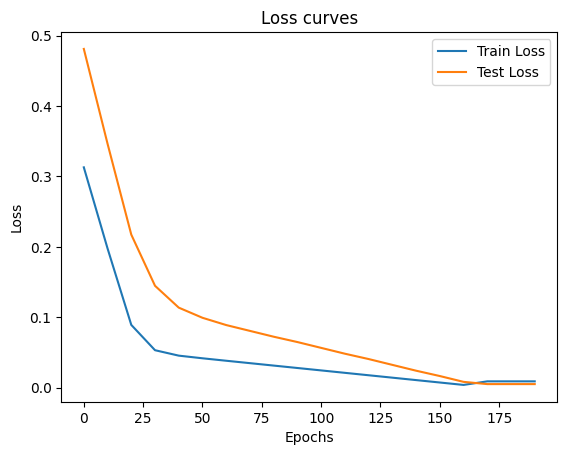

In [100]:
plt.plot(epoch_count,torch.Tensor(train_loss_values).numpy(), label = "Train Loss")
plt.plot(epoch_count, test_loss_values,label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss curves")
plt.legend()

#### Saving and Loading a model

In [102]:
#Saving a model
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents=True,exist_ok=True)

model_name = "pytorch_chapter_01_linreg_model.pth"
model_save_path = model_path / model_name

print(f"Saving model to : {model_save_path}")
torch.save(obj=model.state_dict(),f=model_save_path)

Saving model to : models/pytorch_chapter_01_linreg_model.pth


In [103]:
#Loading a model, Note: we are only saving a loading the state_dict not the whole model.

loaded_model = LinearRegression()

loaded_model.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [104]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])